In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.0em;
line-height:1.6em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: 1em;
text-align:center;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.2em;
line-height:1.2em;
padding-left:1em;
padding-right:3em;
}
</style>
""")

# Spam and Ham Filtering

<img src="https://raw.githubusercontent.com/jalajthanaki/Simplify_Logistic_Regression/master/imags/Image_3_1.png" 
align="middle" alt="Image_3_1" data-canonical-src="" style="width:60%;height:60%">

<p style="text-align:center;font-size:11px;">Image Source is [here](https://www.unlocktheinbox.com/images/resource_spam_filters.png)</p>


```
        Step 1: Import dependencies
    
        Step 2: Load data
    
        Step 3: Exploratory Data Analysis
    
        Step 4: Transforming labels
    
        Step 5: Split data set into training and testing
    
        Step 6: Generating Features using CountVectorizer
    
        Step 7: Train model
    
        Step 8: Test model 
    
            Step 8.1: Measure Accuracy
    
            Step 8.2: Confusion Matrix 
            
            Step 8.3 Area Under Curve
    

```

### Step 1: Import dependencies

In [2]:
# for Python 2: use print only as a function
from __future__ import print_function

In [3]:
import pandas as pd
import numpy as np


# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

# Import sklearn linear model
from sklearn import linear_model

# calculate accuracy of class predictions
from sklearn import metrics

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Load data


In [4]:
# read file into pandas using a relative path
path = 'data/sms.tsv'
data = pd.read_table(path, header=None, names=['label', 'message'])

### Step 3: Exploratory Data Analysis

In [5]:
# examine the shape
data.shape

(5572, 2)

In [6]:
# examine the first 10 rows
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
# examine the class distribution
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64



### Step 4: Transforming labels

In [8]:
# convert label to a numerical variable# conve 
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [9]:
# check that the conversion worked
data.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [10]:
# Generate input (X) and output (y) pair
X = data.message
y = data.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [11]:
total_len = len(data['label'])
percentage_labels = (data['label'].value_counts()/total_len)*100
percentage_labels

ham     86.593683
spam    13.406317
Name: label, dtype: float64

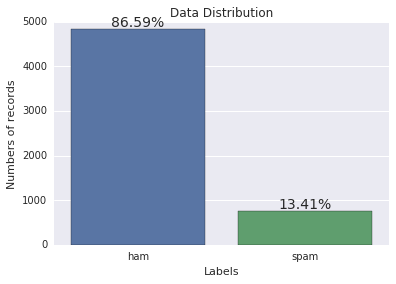

In [12]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(data.label).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels")
ax.set_ylabel("Numbers of records")
plt.show()

### Step 5: Split data set into training and testing

In [13]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


### Step 6: Generating Features using CountVectorizer


#### Let's step back...! and understand the Count Vectorizer

* Intuition behind the count vectorizer

  * Build vocabulary
  * Check which words are present in given text based on the vocabulary

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain

tags = [
    "python, tools",
    "linux, tools, ubuntu",
    "distributed systems, linux, networking, tools",
]

vect = CountVectorizer()
tags = vect.fit_transform(tags)

In [15]:
print(vect.vocabulary_)

{'python': 3, 'networking': 2, 'systems': 4, 'linux': 1, 'ubuntu': 6, 'tools': 5, 'distributed': 0}


In [16]:
sorted(vect.vocabulary_.items(), key=lambda x: x[1])

[('distributed', 0),
 ('linux', 1),
 ('networking', 2),
 ('python', 3),
 ('systems', 4),
 ('tools', 5),
 ('ubuntu', 6)]

In [17]:
tags.toarray()

array([[0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 0]], dtype=int64)

In [18]:
list_of_new_documents = [["python, chicken"], ["linux, cow, ubuntu"],
                         ["machine learning, bird, fish, pig"]]

In [19]:
new_docs = list(chain.from_iterable(list_of_new_documents))
new_docs = vect.transform(new_docs)

In [20]:
new_docs.toarray()

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0]])

#### Back to classification

In [21]:
# instantiate the vectorizer
vect = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [22]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [23]:
# examine the document-term matrix
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [24]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

### Step 7: Train model

In [25]:
clf = linear_model.LogisticRegression(C=1e5)

In [26]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time clf.fit(X_train_dtm, y_train)

CPU times: user 30.3 ms, sys: 0 ns, total: 30.3 ms
Wall time: 32.4 ms


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Step 8: Test model 

In [27]:
# make class predictions for X_test_dtm
y_pred_class = clf.predict(X_test_dtm)

# Predict probability
y_pred_prob_clf = clf.predict_proba(X_test_dtm)

### Let's take a step back and understand the testing matrices

#### Confusion Matrix

|| Predicted (Class Ham)| Predicted (Class Spam)|
|:---:|:---: |:---:|
|  Actual (Class Ham) |True Positive (TP) | False Negative (FN)|
|  Actual (Class Spam)|False Positive(FP) | True Negative (TN) |

```
    Patient: positive for disease

    Healthy: negative for disease

    True positive (TP) = the number of cases correctly identified as patient

    False positive (FP) = the number of cases incorrectly identified as patient

    True negative (TN) = the number of cases correctly identified as healthy

    False negative (FN) = the number of cases incorrectly identified as healthy

```

```
    TP = Correct hit

    TN = Correct rejection
    
    FP = False alarm 
    
    FN = Miss the situation
```

#### Precision, Recall, TPR, FPR and Accuracy

\begin{equation}\Large
   Precision \;||\; Positive \; Pridicted \; Value \;(PPV) =  \frac{TP}{ TP + FP}
\end{equation} 


```


```

\begin{equation}\Large
   Recall \;||\; Hit-rate \;||\; Sensitivity \;||\; True\; Positive\; Rate \;(TPR) =  \frac{TP}{ TP + FN}
\end{equation} 



```


```

\begin{equation}\Large
    Fall-out \;||\; Specificity \;||\; False\; Positive\; Rate \;(FPR) =  \frac{TN}{ TN + FP}
\end{equation} 


```


```


\begin{equation}\Large
   Accuracy =  \frac{TP + TN}{ TP+TN+FP+FN}
\end{equation} 


```



```


<p style="text-align:center;">You can read more on this form [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4614595/)</p>

#### ROC and AUC

__TPR__: This is our __Y-axis__

* This metric corresponds to the proportion of positive data points that are correctly considered as positive, with 
  respect to all positive data points.
  
* In other words, higher TPR, the fewer positive data points we will miss.

__FPR__: This is our __X-axis__

* This metric corresponds to the proportion of negative data points that are mistakenly considered as positive, 
  with respect to all negative data points. 

* In other words, the higher FPR, the more negative data points will be missclassified

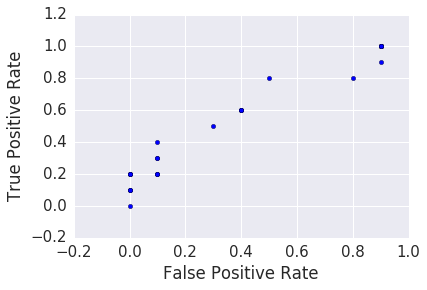

In [28]:
import matplotlib.pyplot as plt
import numpy as np

score = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1])
y = np.array([1,1,0, 1, 1, 1, 0, 0, 1, 0, 1,0, 1, 0, 0, 0, 1 , 0, 1, 0])

roc_x = []
roc_y = []
min_score = min(score)
max_score = max(score)
thr = np.linspace(min_score, max_score, 30)
#print (thr)
FP=0
TP=0
N = sum(y)
#print (N)

P = len(y) - N
#print (len(y))
#print (P)

for (i, T) in enumerate(thr):
    #print(T)
    #print(thr)
    for i in range(0, len(score)):
        if (score[i] > T):
            if (y[i]==1):
                TP = TP + 1
            if (y[i]==0):
                FP = FP + 1
    roc_x.append(FP/float(N))
    roc_y.append(TP/float(P))
    FP=0
    TP=0

plt.scatter(roc_x, roc_y)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####  Step 8.1: Measure Accuracy

In [29]:
# calculate accuracy of class predictions# calcul 
from sklearn import metrics
# metrics.accuracy_score(y_test, y_pred_class)
print("Accuracy: " + '{:.5f}%'.format(metrics.accuracy_score(y_test, y_pred_class)*100))

Accuracy: 98.85140%


#### Step 8.2: Confusion Matrix 

In [30]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1205,    3],
       [  13,  172]])

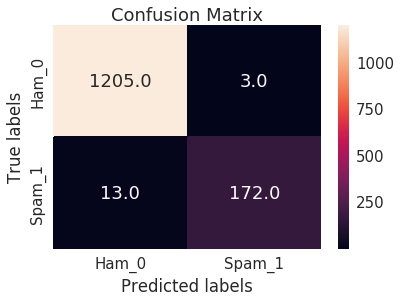

In [31]:
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_class), annot=True, ax = ax,fmt=".1f")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Ham_0', 'Spam_1']); ax.yaxis.set_ticklabels(['Ham_0', 'Spam_1'])

In [32]:
# print message text for the false positives (ham incorrectly classified as spam)
X_test[y_test < y_pred_class]

2340    Cheers for the message Zogtorius. Ive been st...
4009    Forgot you were working today! Wanna chat, but...
1497    I'm always on yahoo messenger now. Just send t...
Name: message, dtype: object

In [33]:
# print message text for the false negatives (spam incorrectly classified as ham)
X_test[y_test > y_pred_class]

1777                    Call FREEPHONE 0800 542 0578 now!
763     Urgent Ur £500 guaranteed award is still uncla...
3132    LookAtMe!: Thanks for your purchase of a video...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4394    RECPT 1/3. You have ordered a Ringtone. Your o...
4949    Hi this is Amy, we will be sending you a free ...
761     Romantic Paris. 2 nights, 2 flights from £79 B...
19      England v Macedonia - dont miss the goals/team...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [34]:
# example false negative
X_test[3132]

"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."

In [35]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = clf.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([9.90605877e-07, 4.03318205e-09, 1.38284799e-07, ...,
       6.48403564e-06, 1.00000000e+00, 3.77161208e-09])

#### Step 8.3 Area Under Curve


In [36]:
# calculate AUC
# metrics.roc_auc_score(y_test, y_pred_prob)
print("AUC Score: " + '{:.5f}%'.format(metrics.roc_auc_score(y_test, y_pred_prob)*100))

AUC Score: 99.32611%


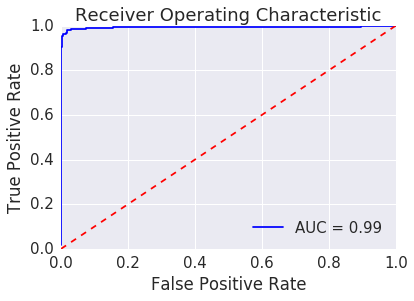

In [37]:
preds = y_pred_prob_clf[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<img src="https://raw.githubusercontent.com/jalajthanaki/Simplify_Logistic_Regression/master/imags/Image_3_2.jpg" 
align="middle" alt="Image_3_1" data-canonical-src="" style="width:40%;height:40%">

<p style="text-align:center;font-size:11px;">Image Source is [here](https://memegenerator.net/instance/67671039/i-know-kung-fu-i-know-logistic-regression-show-me)</p>

## What is next?

### One vs. All Classifier ( Maltinomial LR )

<img src="https://raw.githubusercontent.com/jalajthanaki/Simplify_Logistic_Regression/master/imags/Image_3_3.jpg" 
align="middle" alt="Image_3_1" data-canonical-src="" style="width:70%;height:70%">

<p style="text-align:center;font-size:11px;">Image Source is [here](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2017/03/Multinomial-Logistic-Regression-model.jpg?w=700)</p>

<img src="https://raw.githubusercontent.com/jalajthanaki/POS-tag-workshop/master/imgs/Image_1_6.png" 
align="middle" alt="About Me" data-canonical-src="" style="width:80%;height:80%">

